link: https://www.kaggle.com/jindongwang92/crossposition-activity-recognition

https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring
        
# DSADS

Columns 1~405 are features, listed in the order of 'Torso', 'Right Arm', 'Left Arm', 'Right Leg', and 'Left Leg'. Each position contains 81 columns of features. 

* Column 406 is the activity sequence indicating the executing of activities (usually not used in experiments). 
* Column 407 is the activity label (1~19). 
* Column 408 denotes the person (1~8)

B. Barshan and M. C. Yuksek, “Recognizing daily and sports activities ¨ in two open source machine learning environments using body-worn sensor units,” The Computer Journal, vol. 57, no. 11, pp. 1649–1667, 2014.

#### Feature extraction by

Jindong Wang, Yiqiang Chen, Lisha Hu, Xiaohui Peng, and Philip S. Yu. Stratified Transfer Learning for Cross-domain Activity Recognition. 2018 IEEE International Conference on Pervasive Computing and Communications (PerCom).


In [1]:
import scipy.io
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "dsads"
mat = scipy.io.loadmat('../Dataset/DASDS/'+filename+".mat")
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 21 15:26:21 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data_dsads': array([[1.8159e-01, 1.2891e-03, 9.7740e-01, ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.8186e-01, 9.6067e-04, 9.7901e-01, ..., 2.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.8171e-01, 5.2793e-04, 9.9120e-01, ..., 3.0000e+00, 1.0000e+00,
         1.0000e+00],
        ...,
        [2.2536e-01, 2.7581e-01, 1.4131e-01, ..., 5.8000e+01, 1.9000e+01,
         8.0000e+00],
        [2.4748e-01, 2.9647e-01, 1.0928e-01, ..., 5.9000e+01, 1.9000e+01,
         8.0000e+00],
        [2.2062e-01, 2.4118e-01, 8.0170e-02, ..., 6.0000e+01, 1.9000e+01,
         8.0000e+00]])}

In [3]:
raw = pd.DataFrame(mat["data_dsads"])
raw.head()

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,0.18159,0.001289,0.97740,0.001202,0.92034,0.002124,0.60417,0.18159,0.001110,0.001035,...,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,1.0,1.0,1.0
1,0.18186,0.000961,0.97901,0.000642,0.94172,0.001493,0.57292,0.18186,0.000792,0.000812,...,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,2.0,1.0,1.0
2,0.18171,0.000528,0.99120,0.000466,0.93672,0.000539,0.61458,0.18171,0.000407,0.000345,...,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,3.0,1.0,1.0
3,0.18173,0.001531,0.98364,0.001466,0.93766,0.001969,0.58333,0.18173,0.001251,0.001172,...,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,4.0,1.0,1.0
4,0.18147,0.000815,0.98862,0.000720,0.93724,0.000945,0.54167,0.18147,0.000586,0.000560,...,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,5.0,1.0,1.0


In [4]:
columns = ["Feat"+str(i) for i in range(405)] + ["ActivitySeq", "ActivityID", "PersonID"]
raw.columns = columns
raw.head()
raw["ActivityID"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [16]:
activityNames = [
    "sitting",
    "standing",
    "lying on back side",
    "lying on right side",
    "ascending stairs",
    "descending stairs",
    "standing in an elevator still",
    "moving around in an elevator",
    "walking in a parking lot",
    "walking on a treadmill1",
    "walking on a treadmill2",
    "running on a treadmill3",
    "exercising on a stepper",
    "exercising on a cross trainer",
    "cycling in horizontal positions",
    "cycling in vertical positions",
    "rowing",
    "jumping",
    "playing basketball"
]

In [17]:
def add_activityname(x):
    name = "R"+str(int(x["PersonID"]))+"_"+activityNames[int(x["ActivityID"])-1]
    name = activityNames[int(x["ActivityID"])-1]
    return name

raw["ActivityName"] = raw.apply(add_activityname, axis=1)
df = raw.drop('ActivityID', 1)
df = df.drop('PersonID', 1)
df = df.drop('ActivitySeq', 1)
df.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat396,Feat397,Feat398,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,ActivityName
0,0.18159,0.001289,0.97740,0.001202,0.92034,0.002124,0.60417,0.18159,0.001110,0.001035,...,0.000001,0.86705,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,sitting
1,0.18186,0.000961,0.97901,0.000642,0.94172,0.001493,0.57292,0.18186,0.000792,0.000812,...,0.000003,0.78944,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,sitting
2,0.18171,0.000528,0.99120,0.000466,0.93672,0.000539,0.61458,0.18171,0.000407,0.000345,...,0.000002,0.85388,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,sitting
3,0.18173,0.001531,0.98364,0.001466,0.93766,0.001969,0.58333,0.18173,0.001251,0.001172,...,0.000001,0.87393,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,sitting
4,0.18147,0.000815,0.98862,0.000720,0.93724,0.000945,0.54167,0.18147,0.000586,0.000560,...,0.000002,0.79027,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,sitting


In [7]:
# Scale to [0, 1]
for i in range(243):
    f = (df["Feat"+str(i)]+1)/2
    df["Feat"+str(i)] = f

In [8]:
df.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat396,Feat397,Feat398,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,ActivityName
0,0.590795,0.500645,0.988700,0.500601,0.96017,0.501062,0.802085,0.590795,0.500555,0.500518,...,0.000001,0.86705,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,sitting
1,0.590930,0.500480,0.989505,0.500321,0.97086,0.500747,0.786460,0.590930,0.500396,0.500406,...,0.000003,0.78944,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,sitting
2,0.590855,0.500264,0.995600,0.500233,0.96836,0.500270,0.807290,0.590855,0.500204,0.500172,...,0.000002,0.85388,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,sitting
3,0.590865,0.500766,0.991820,0.500733,0.96883,0.500985,0.791665,0.590865,0.500626,0.500586,...,0.000001,0.87393,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,sitting
4,0.590735,0.500408,0.994310,0.500360,0.96862,0.500472,0.770835,0.590735,0.500293,0.500280,...,0.000002,0.79027,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,sitting


In [9]:
df.to_csv(filename+".feat", index=False)

In [10]:
df["ActivityName"].unique()

array(['sitting', 'standing', 'lying on back side', 'lying on right side',
       'ascending stairs', 'descending stairs',
       'standing in an elevator still', 'moving around in an elevator',
       'walking in a parking lot', 'walking on a treadmill1',
       'walking on a treadmill2', 'running on a treadmill3',
       'exercising on a stepper', 'exercising on a cross trainer',
       'cycling on an exercise bike in horizontal positions',
       'cycling on an exercise bike in vertical positions', 'rowing',
       'jumping', 'playing basketball'], dtype=object)

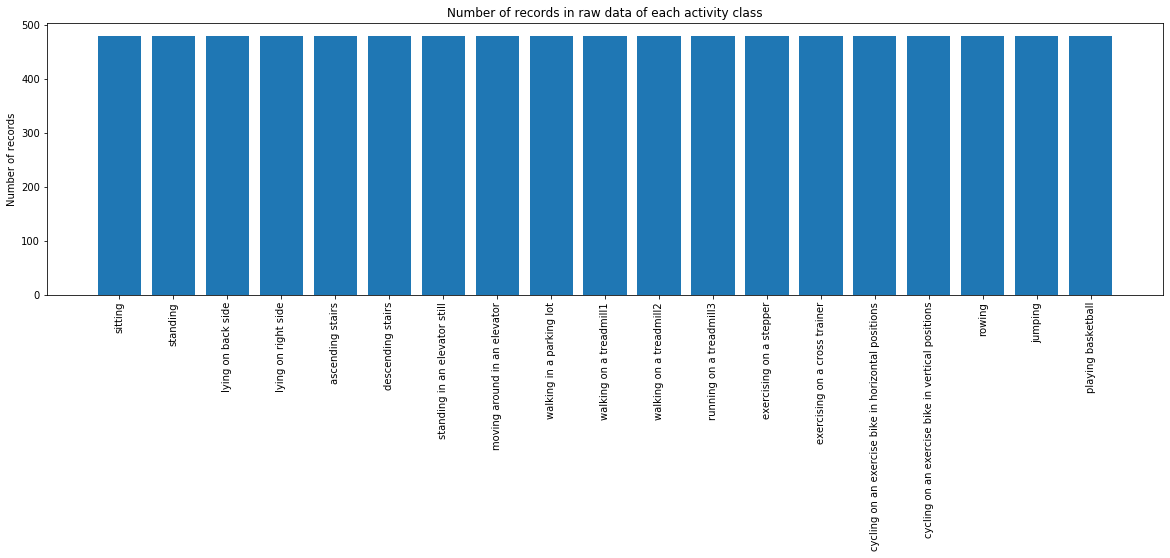

In [11]:
activity_labels = df["ActivityName"].unique()
ind = np.arange(len(activity_labels))
plt.rcParams['figure.figsize'] = [10, 5]
nRow = []
for label in activity_labels:
    c = len(df[df["ActivityName"]==label])
    nRow.append(c)
    
plt.rcParams['figure.figsize'] = [20, 5]
p1 = plt.bar(ind, nRow)

plt.ylabel('Number of records')
plt.title('Number of records in raw data of each activity class')
plt.xticks(ind, activity_labels, rotation='vertical')

plt.show()

['sitting' 'standing' 'lying on back side' 'lying on right side'
 'ascending stairs' 'descending stairs' 'standing in an elevator still'
 'moving around in an elevator' 'walking in a parking lot'
 'walking on a treadmill1' 'walking on a treadmill2'
 'running on a treadmill3' 'exercising on a stepper'
 'exercising on a cross trainer' 'cycling in horizontal positions'
 'cycling in vertical positions' 'rowing' 'jumping' 'playing basketball']


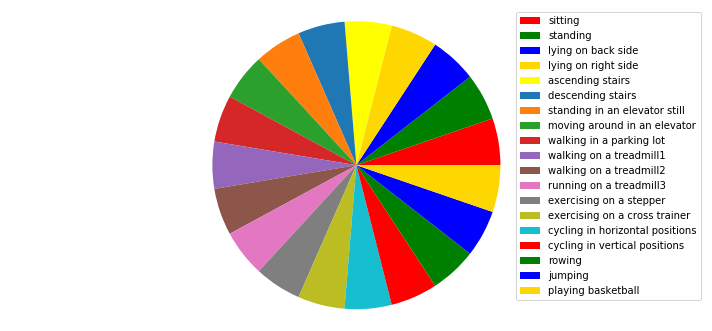

In [18]:
from functools import cmp_to_key

from matplotlib import colors as mcolors
plt.rcParams['figure.figsize'] = [10, 5]
vectors = df
colors = ["red", "green", "blue", "gold", "yellow"] + list(mcolors.TABLEAU_COLORS.values()) 

p = vectors["ActivityName"]
v = vectors[["ActivityName"]]
v["c"] = 1

labels = p.unique()
count = v.groupby(['ActivityName']).agg(['count'])[("c", "count")]
labels, count

def compare(item1, item2):
    return count[item2] - count[item1]

print(labels)
labels = sorted(labels, key=cmp_to_key(compare))
sizes = [count[l] for l in labels]

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(patches, labels, loc="best")
plt.tight_layout()
plt.show()